<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## IA (Inteligência Artificial) e ML (Machine Learning - Aprendizagem de Máquina) com Scikit-learn

Continuação...

Mais sobre IA ML com Scikit-learn...

### Objetivo da aula
- Salvar e reutilizar um modelo de IA ML Scikit-learn
- Publicar (deploy) o modelo treinado como web service (Flask)

### Ferramentas desta aula

- Pickle - Serialização de objetos
- Flask - Criação de microserviços - WEB API - WEB SERVICES
- Scikit-learn - IA ML
- Requests - Fazer chamadas de WEB WERVICES REST JSON, XML, etc

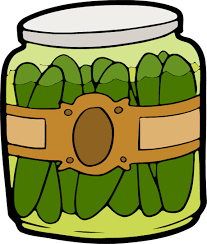

Salvar modelo de regressão logistica do Scikit-learn para reutilizar em WEB API com Flask

### LAB

Importando LIBs

In [1]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

Carregando dados de diabetes, já usamos estes dados em aula...

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes_df = pandas.read_csv(url, names=names)

Agora seguier nosso ritual de ML (AI) com Scikit-learn:

1. Dividir os dados teste e treinamento
1. Criar uma instância do modelo, neste caso regressão logistica
1. Treinar
1. Salvar o modelo (NOVIDADE)
1. Ler o modelo (NOVIDADE)
1. Reutilizar o modelo já treinado

In [6]:
array_df = diabetes_df.values

X = array_df[:,0:8] # População, dados de amostra
Y = array_df[:,8]   # Label, tag

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

# Fit treinamento do modelo, com dados de treinamento
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Salvando o modelo treinado com Pickle
filename = 'lr_model.sav'
pickle.dump(model, open(filename, 'wb'))

# ...6 meses depois...

# Carregar do arquivo no dico .sav o modelo treinado previamente, para uso...
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(X_test, Y_test)

print(result)

0.7874015748031497


Vamos espiar os dados (população):

In [42]:
X_test

array([[  1.   ,  90.   ,  62.   , ...,  27.2  ,   0.58 ,  24.   ],
       [  7.   , 181.   ,  84.   , ...,  35.9  ,   0.586,  51.   ],
       [ 13.   , 152.   ,  90.   , ...,  26.8  ,   0.731,  43.   ],
       ...,
       [  4.   , 118.   ,  70.   , ...,  44.5  ,   0.904,  26.   ],
       [  7.   , 152.   ,  88.   , ...,  50.   ,   0.337,  36.   ],
       [  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ]])

Listar os arquivos .sav na pasta (diretório) atual:

In [58]:
!ls -l *.sav

-rw-rw-r-- 1 fito fito 738 Oct 31 00:31 finalized_model.sav
-rw-rw-r-- 1 fito fito 739 Oct 31 00:47 lr_model.sav


Implementação do web service Flask para teste da chamada do modelo:

Para executar na linha de comando: `flask --app ws-lr-model.py run`

```python
# To start this web service run at the command line:
# flask --app ws-lr-model.py run

from flask import Flask, request, jsonify
from datetime import datetime
import pickle
import random

app = Flask(__name__)

@app.route("/")
def hello_world():
    now = datetime.now()
    return f"<h1>Hello FIAP - {now}</h1>"

@app.route("/calc/<a>/<b>")
def calc(a, b):
    output = {"sum": float(a) + float(b),
              "mult": float(a) * float(b),
              "max" : max([float(a),float(b)]),
              "min" : min([float(a),float(b)]),
              "average" : (float(a)+float(b))/2,
              "power" : float(a)**float(b)}              
                            
    return jsonify(output)

@app.route("/echo", methods = ['POST'])
def echo_service():
    #Obter os dados enviado via HTTP o JSON
    json_data = request.get_json()

    json_data["_status"] = "Echo Service"
    json_data["_college"] = "FIAP"
    json_data["_now"] = str(datetime.now())
    json_data["_luck_number"] = random.random()*1000
    
    return jsonify(json_data)

@app.route("/diabetes", methods = ['POST'])
def diabetes_model():
    # Ler o modelo de rl
    filename = 'lr_model.sav'
    lr_model = pickle.load(open(filename, 'rb'))

    #Obter os dados enviado via HTTP o JSON
    test_data = request.get_json()

    #Usar JSON recebido para teste, no modelo de RL previamente treinado
    prediction = lr_model.predict(test_data)

    # Retorna resultado
    return jsonify(list(prediction))



```

Este web service faz alguns cálculos com base em dois números fornecidos na URL:

In [53]:
import requests

requests.get('http://localhost:5000/calc/8/77', data=test_record).json()

{'average': 42.5,
 'max': 77.0,
 'min': 8.0,
 'mult': 616.0,
 'power': 3.450873173395282e+69,
 'sum': 85.0}

Este é outro web service de teste, _echo_, retorna a mesma mensagem JSON (dict) enviado, com alguns campos novos...

In [54]:
requests.post('http://localhost:5000/echo', json={"msg": "Vai Corinthians!!"}).json()

{'_college': 'FIAP',
 '_luck_number': 303.5353185130163,
 '_now': '2024-10-31 02:00:05.299558',
 '_status': 'Echo Service',
 'msg': 'Vai Corinthians!!'}

Agora vamos criar um dict com os dados para serem testados no modelo de diagnostico de diabetes...

In [48]:
test_record = {
    'preg' :  7,
    'plas' : 181, 
    'pres' : 84, 
    'skin' : 21, 
    'test' : 192, 
    'mass' : 35.9, 
    'pedi' : 0.586, 
    'age'  : 51}


Como o modelo foi treinado em arrays, não em dicionários (dict), vamos usar só os valores...

In [55]:
dtest=[list(test_record.values())]

dtest

[[7, 181, 84, 21, 192, 35.9, 0.586, 51]]

Enviando para o web service a lista com os valores, para obter o resultado, sim ou não para diabetes...

In [56]:
requests.post('http://localhost:5000/diabetes', json=dtest).text

'[1.0]\n'

Quando executar o script python (.py) com o web service em Flask, a tela da linha de comando vai ficar aberta exibindo o log do servidor web...

Flesk é usado em nuvem, no GCP, Azure entre outros...

> &nbsp;
> Podemos fácilmente tornar nosso modelo público na Internet com o ambiente em nuvem da PythonAnyware (Anaconda)<br>
> https://www.pythonanywhere.com/
> &nbsp;

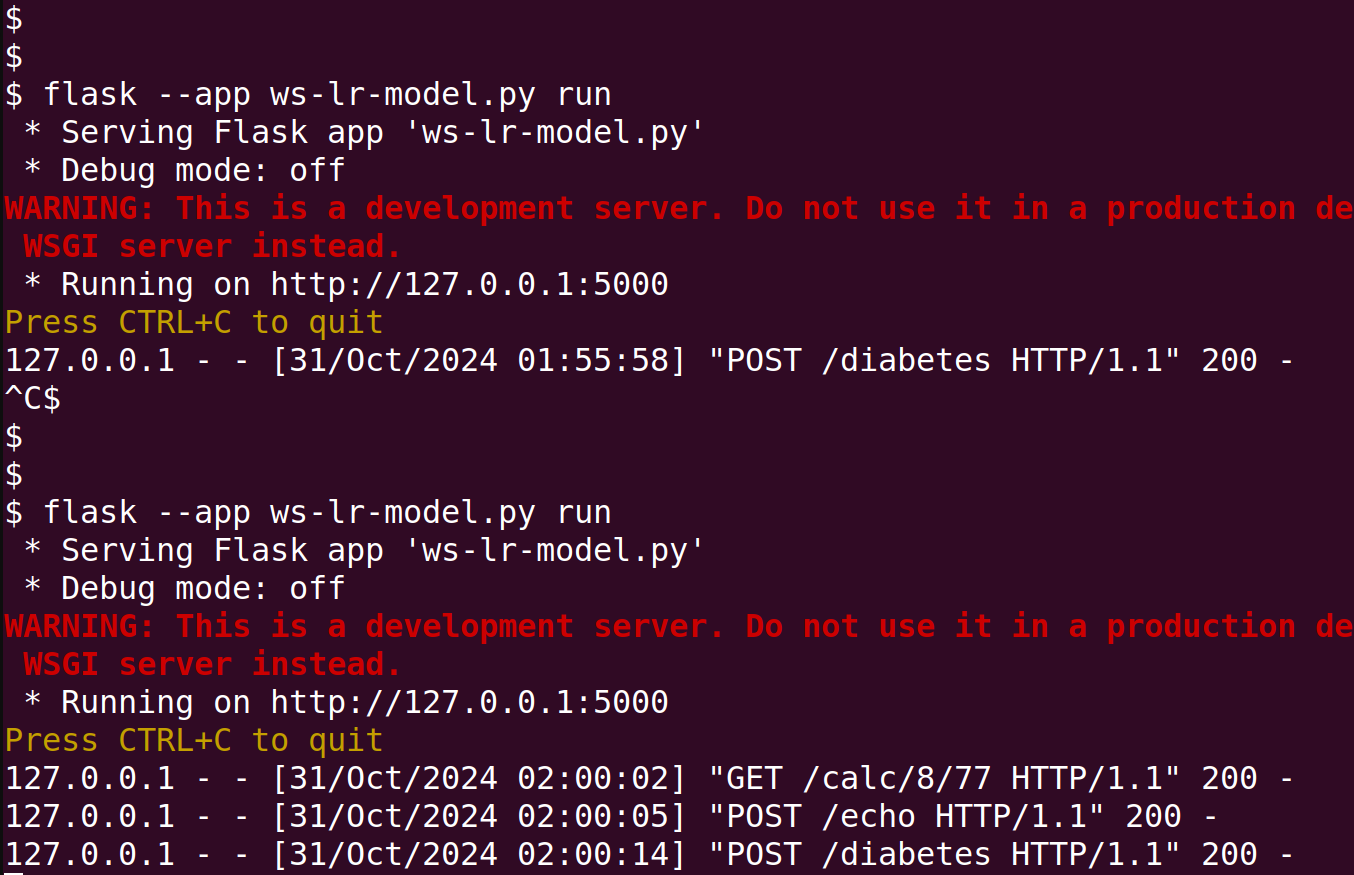

### Referência

- https://docs.python.org/3/library/pickle.html
- https://scikit-learn.org
- https://flask.palletsprojects.com
- https://requests.readthedocs.io
- https://scikit-learn.org/1.5/model_persistence.html
- https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

### Extra

Sábado dia Dia 9 de novembro o congresso anual que organizo desde 2013 será realizado no Mackenzie.<BR>
Todos são bem vindos, gratuito e com certificado.

IA, ML, LLMs, redes neurais, geração e código automatizado, pesquisa, ciências dos dados...

https://www.wolfram.com/events/user-conference-brazil/2024/

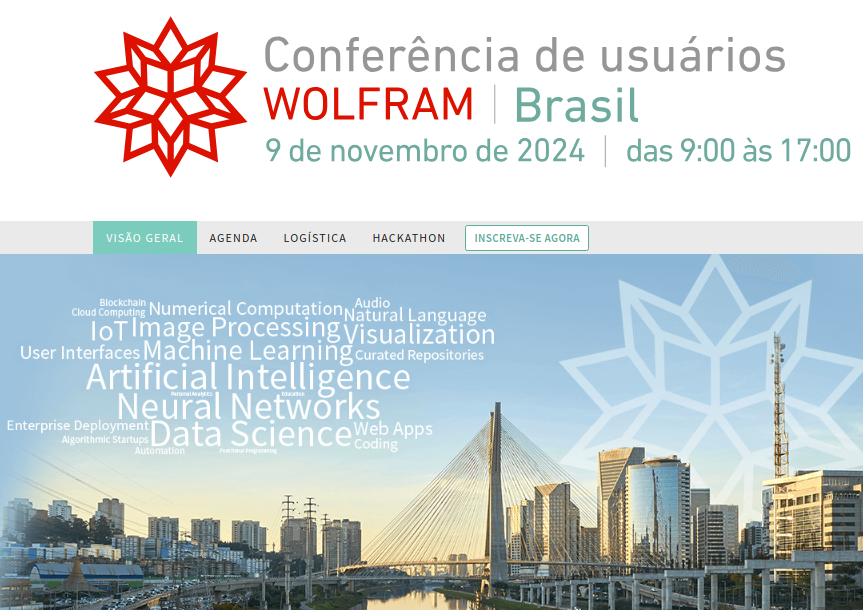

### Bonus

Desde 2017 participo de uma competição anual de programação, tema livre código em até 140 caracteres.<br>
Perdi dinovo este ano!!!

O meu programa em menos de 140 caracteres, mostra em linhas coloridas todos so planos de voo para o aeroporto de CMI onde fica a sede da Wolfram, para o dia que o código é executado. Usando IA do Wolfram|Alpha para obter os dados. Código em Wolfram Language.

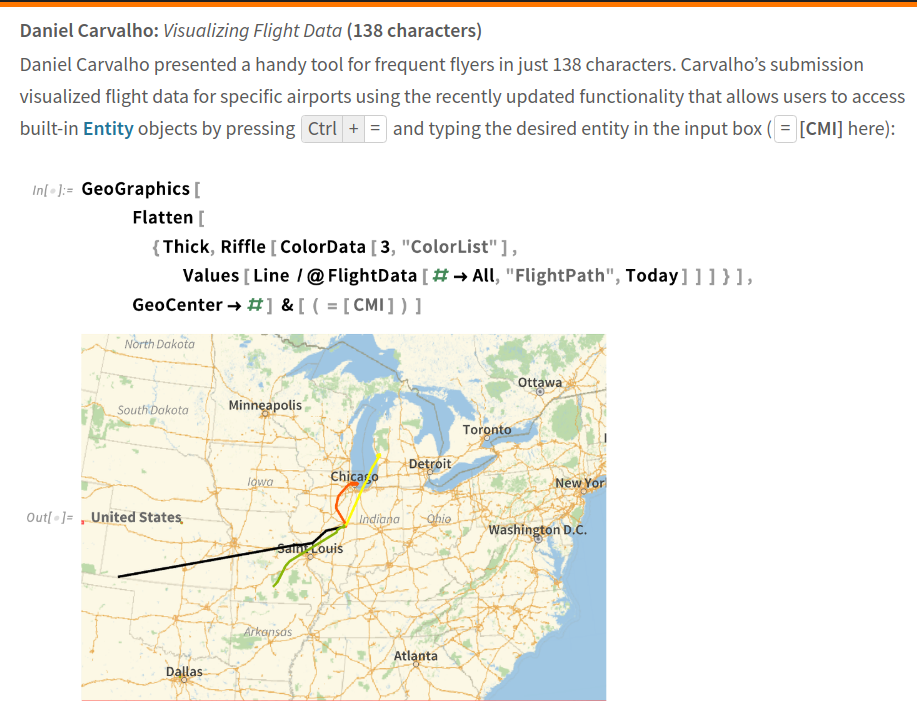

https://blog.wolfram.com/2024/10/30/announcing-the-winners-of-the-2024-one-liner-competition/

### Meme

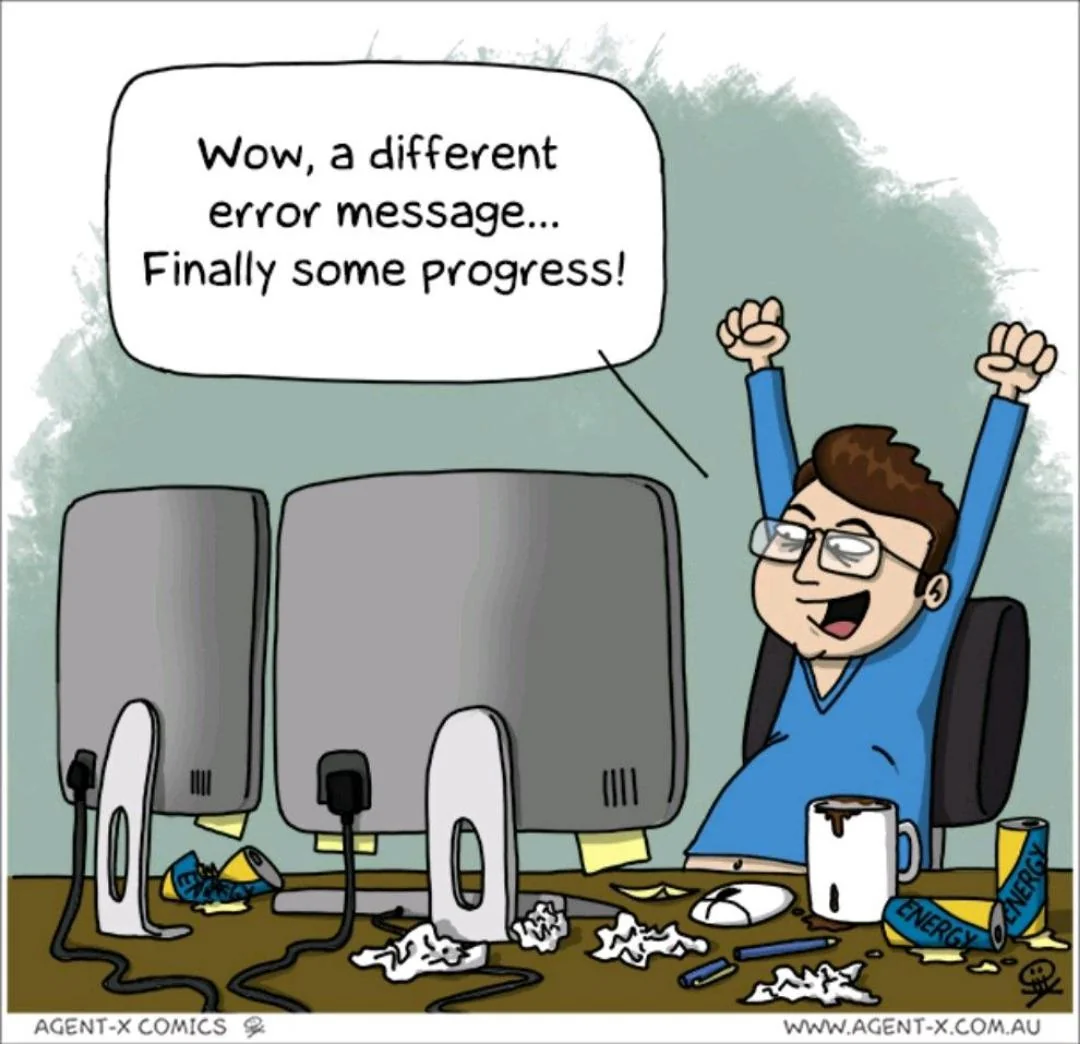